# **Machine Learning –: Logistic Regression**
-----
 ## **1. Binary Classification**
------

- ### Import required libraries

In [1]:
import pandas as pd
import numpy as np

- ### Loading the dataset

In [2]:
df = pd.read_csv("E:\Data Science Notes\8.MACHINE LEARNING\insurance_data\insurance_data.csv") 


- #### Apply some **EDA**

In [3]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
df.tail()

,age,bought_insurance
22,40,1
23,45,1
24,50,1
25,54,1
26,23,0


In [5]:
df.shape

(27, 2)

In [6]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [7]:
df.isna().sum()

age                 0
bought_insurance    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


- ### Plotting the dataset

In [9]:
import matplotlib.pyplot as plt

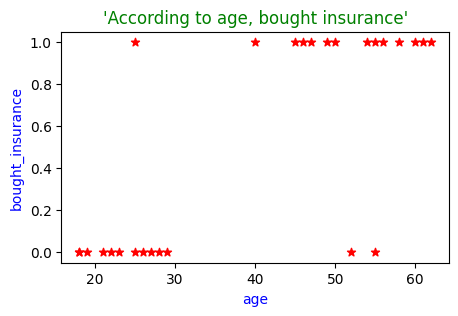

In [10]:
plt.figure(figsize = (5,3))

plt.scatter(df.age, df.bought_insurance, marker = '*', color = 'r')

plt.title("'According to age, bought insurance'",c = 'g')

plt.xlabel('age',c = 'b')
plt.ylabel('bought_insurance', c = 'b')

plt.show()

- ### Data preparation

In [11]:
X = df[['age']].values
y = df.bought_insurance.values


- ### Splitting the dataset 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42)

X_train

array([[58],
       [27],
       [50],
       [25],
       [46],
       [56],
       [47],
       [55],
       [40],
       [52],
       [54],
       [45],
       [19],
       [23],
       [21],
       [60],
       [18],
       [49],
       [18],
       [55]], dtype=int64)

In [14]:
X_test

array([[62],
       [29],
       [61],
       [26],
       [22],
       [28],
       [25]], dtype=int64)

In [15]:
y_train

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [16]:
y_test

array([1, 0, 1, 0, 0, 0, 1], dtype=int64)

- ### Model creation

In [17]:
from sklearn.linear_model import LogisticRegression 

In [18]:
log_model = LogisticRegression()

- ### Train the model

In [19]:
log_model.fit(X_train,y_train)

LogisticRegression()

- ### Prediction the Model

In [20]:
print(log_model.predict([[30]]))

[0]


In [21]:
print(log_model.predict([[32]]))

[0]


In [22]:
print(log_model.predict([[35]]))

[0]


In [23]:
print(log_model.predict([[38]]))

[0]


In [24]:
print(log_model.predict([[60]]))

[1]


In [25]:
print(log_model.predict([[25]]))

[0]


In [26]:
print(log_model.predict(X_train))

[1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1]


In [27]:
print(log_model.predict(X_test))

[1 0 1 0 0 0 0]


- ### Taking value at run time for prediction

In [28]:
age = int(input("Enter the age : "))

print(log_model.predict([[age]]))

Enter the age :  35


[0]


- ### Check the Prediction Score

In [29]:
log_model.score(X_test, y_test) 


0.8571428571428571

- ### Prediction probability 

In [30]:
log_model.predict_proba(X_test)

array([[0.03852116, 0.96147884],
       [0.83724556, 0.16275444],
       [0.04435591, 0.95564409],
       [0.88887008, 0.11112992],
       [0.93509679, 0.06490321],
       [0.8563132 , 0.1436868 ],
       [0.90259326, 0.09740674]])

##   **2. Multi class Classification**
--------

- ### Loading **digits** dataset
   -  #### Sklearn library comes up with built-in datasets

In [31]:
from sklearn.datasets import load_digits 

In [32]:
digits = load_digits()
len(digits.data)

1797

- ### Checking Attributes

In [33]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

- ### accessing **DESCR** attribute

In [37]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

- ### accessing **data** attribute

In [38]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


- ### checking the first value

In [40]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

- ### checking second value

In [41]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

- ### accessing **images** attribute 

In [44]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [45]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

- ### Displaying images

In [56]:
import matplotlib.pyplot as plt

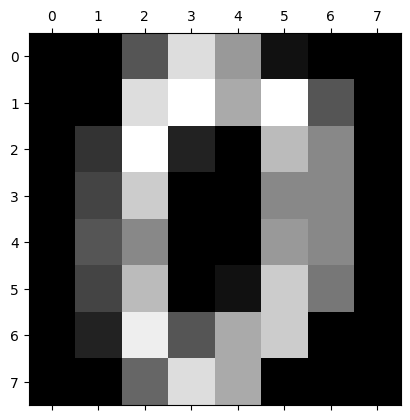

In [61]:
plt.matshow(digits.images[0])
plt.gray()
plt.show()

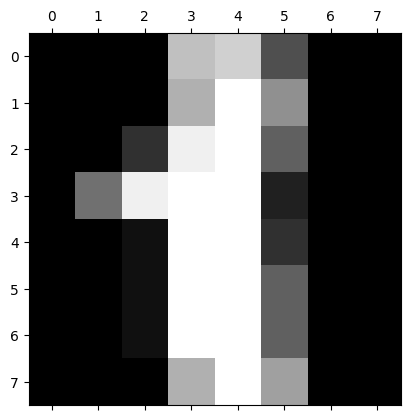

In [62]:
plt.matshow(digits.images[1])
plt.gray()
plt.show()

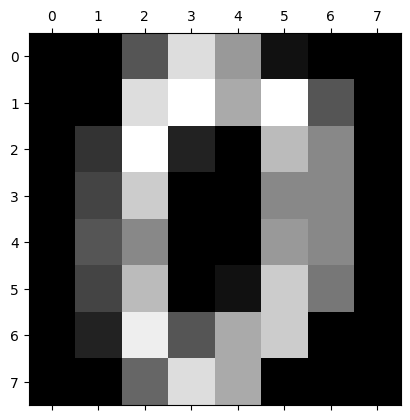

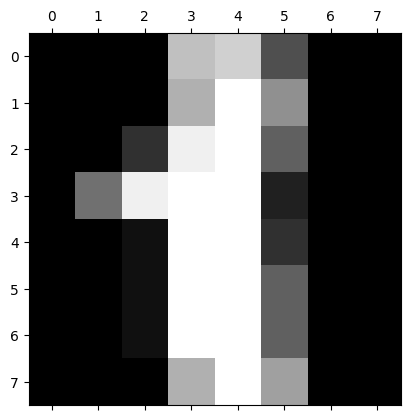

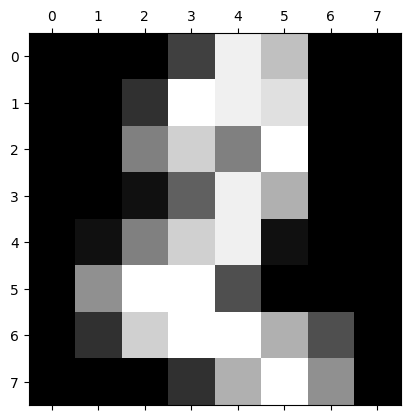

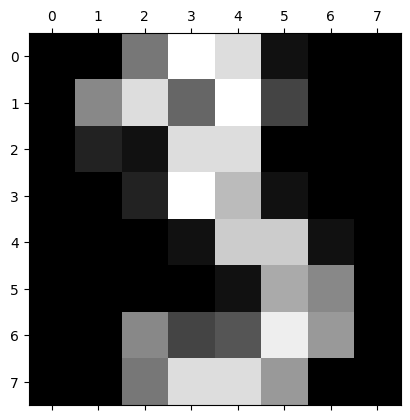

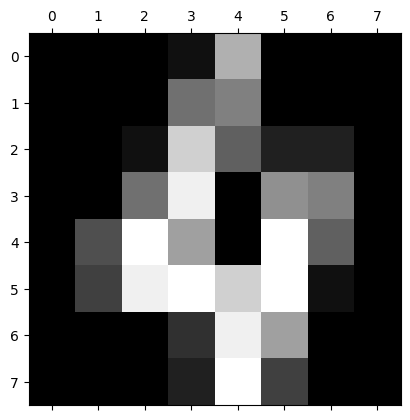

In [65]:
for i in range(5):
    plt.matshow(digits.images[i])
    plt.gray()
    plt.show()



- ### accessing **target** attribute

In [66]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [69]:
digits.target[:5]

array([0, 1, 2, 3, 4])

- ### Splitting the dataset 

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2) 

- ### Model Creation

In [76]:
from sklearn.linear_model import LogisticRegression 


In [77]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 3000) 


- ### Model Training

In [78]:
model.fit(X_train, y_train) 

LogisticRegression(max_iter=3000)

In [79]:
X_train

array([[ 0.,  0.,  0., ..., 12.,  5.,  0.],
       [ 0.,  0.,  9., ...,  3.,  0.,  0.],
       [ 0.,  0.,  1., ...,  7.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 12.,  3.,  0.],
       [ 0.,  0.,  2., ...,  9.,  0.,  0.],
       [ 0.,  0., 11., ..., 13., 16.,  7.]])

In [80]:
y_train

array([6, 5, 9, ..., 6, 0, 2])

- ### Checking model Score

In [81]:
model.score(X_test, y_test)

0.975

- ### Model prediction

In [87]:
model.predict([digits.data[6]])

array([6])

In [88]:
model.predict([digits.data[9]])

array([9])

In [102]:
model.predict([digits.data[13]])

array([3])